In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#storing train dataset in df
df=pd.read_excel('flights_train.csv.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#storing test dataset in df2
df2=pd.read_excel('flights_test.csv.xlsx')
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
#to check shape of train data
print('number of rows and columns of train data are :',df.shape)

number of rows and columns of train data are : (10683, 11)


In [6]:
#to check shape of test data
print('number of rows and columns of test data are :',df2.shape)

number of rows and columns of test data are : (2671, 10)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#checking for nan values in train data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there is one nan value present in total_stop as well as route

In [9]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# we can see that both the nan values are present in the same row so we need to fill the data with similar flight routes other row

In [10]:
df.loc[9039,'Route']='DEL → MAA → COK'
df.loc[9039,'Total_Stops']='1 stop'
df.loc[[9039]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.shape

(10683, 11)

In [13]:
#checking nan values in test dataset
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# there are no more nan values in the train datset as well as in the test data

In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# the whole data contains object type data except price

# checking for value counts

In [16]:
for i in df.columns:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


# we have to convert categorical column to numerical

# we can see Date of journey as it mentions day,month and year of journey so will split the date of journey and convert the data into numerical

In [17]:
#spliting the date of journey into date,month and year and coverting the data into numerical
date=[]
month=[]
year=[]
for i in range(len(df.Date_of_Journey)):
    date.append(int(df.Date_of_Journey[i].split('/')[0]))
    month.append(int(df.Date_of_Journey[i].split('/')[1]))
    year.append(int(df.Date_of_Journey[i].split('/')[2]))

In [18]:
df['date']=date
df['month']=month
df['year']=year
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


# doing the same for the test data

In [19]:
#spliting the date of journey into date,month and year and coverting the data into numerical
date=[]
month=[]
year=[]
for i in range(len(df2.Date_of_Journey)):
    date.append(int(df2.Date_of_Journey[i].split('/')[0]))
    month.append(int(df2.Date_of_Journey[i].split('/')[1]))
    year.append(int(df2.Date_of_Journey[i].split('/')[2]))

In [20]:
df2['date']=date
df2['month']=month
df2['year']=year
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month,year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3,2019


# we need to convert duration which is object type into numerical by converting it into mins

In [21]:
#converting duration into mins for train dataset
total=[]
for i in range(len(df.Duration)):
    if len(df.Duration[i].split())>1:
        hour=int(df.Duration[i].split()[0][:-1])*60
        minute=int(df.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if df.Duration[i].split()[0][-1]=='h':
            total.append(int(df.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(df.Duration[i].split()[0][:-1]))
df['time']=total

# will do the same for test data

In [22]:
#converting duration into mins for test dataset
total=[]
for i in range(len(df2.Duration)):
    if len(df2.Duration[i].split())>1:
        hour=int(df2.Duration[i].split()[0][:-1])*60
        minute=int(df2.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if df2.Duration[i].split()[0][-1]=='h':
            total.append(int(df2.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(df2.Duration[i].split()[0][:-1]))
df2['time']=total

In [23]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,160


In [24]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
date                int64
month               int64
year                int64
time                int64
dtype: object

# now we need to convert total_stops into numerical and place them in order

In [25]:
#converting for train data
for i in range(len(df.Total_Stops)):
    if df.Total_Stops[i]=='1 stop':
        df.Total_Stops[i]=1
    elif df.Total_Stops[i]=='non-stop':
        df.Total_Stops[i]=0
    elif df.Total_Stops[i]=='2 stops':
        df.Total_Stops[i]=2
    elif df.Total_Stops[i]=='3 stops':
        df.Total_Stops[i]=3
    elif df.Total_Stops[i]=='4 stops':
        df.Total_Stops[i]=4

In [26]:
#converting for test data
for i in range(len(df2.Total_Stops)):
    if df2.Total_Stops[i]=='1 stop':
        df2.Total_Stops[i]=1
    elif df2.Total_Stops[i]=='non-stop':
        df2.Total_Stops[i]=0
    elif df2.Total_Stops[i]=='2 stops':
        df2.Total_Stops[i]=2
    elif df2.Total_Stops[i]=='3 stops':
        df2.Total_Stops[i]=3
    elif df2.Total_Stops[i]=='4 stops':
        df2.Total_Stops[i]=4

In [27]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,2019,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,2019,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4,2019,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,2019,160


In [28]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
date                int64
month               int64
year                int64
time                int64
dtype: object

In [29]:
df=df.astype({'Total_Stops': np.int64})

In [30]:
df2=df2.astype({'Total_Stops': np.int64})

# drop column year as it contains same value in the whole dataset 
# Date_of_Journey can be dropped as we already split the data in date month and year
# drop date column as it does not show much variation in prices compared to month
# we can drop route as it is already been replaced by total_stops
# also drop arrival time, departure time as column duration is enough.
# we can drop the duration column as it is been replaced by time(mins)

In [31]:
#dropping columns in train data
df=df.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [32]:
#dropping columns in test data
df2=df2.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [33]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,month,time
0,Jet Airways,Delhi,Cochin,1,No info,6,655
1,IndiGo,Kolkata,Banglore,1,No info,5,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,5,1425
3,Multiple carriers,Delhi,Cochin,1,No info,5,780
4,Air Asia,Banglore,Delhi,0,No info,6,170
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,6,1435
2667,IndiGo,Kolkata,Banglore,0,No info,3,155
2668,Jet Airways,Delhi,Cochin,1,No info,3,395
2669,Air India,Delhi,Cochin,1,No info,3,915


In [34]:
df2.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
month               int64
time                int64
dtype: object

# Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

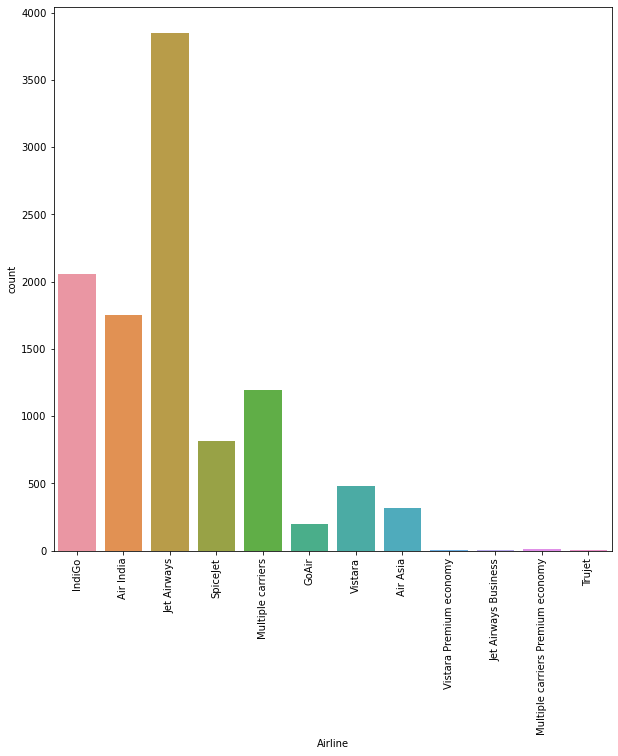

In [35]:
plt.subplots(figsize=(10,10))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

# jet airways have the highest number of flights in this data

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

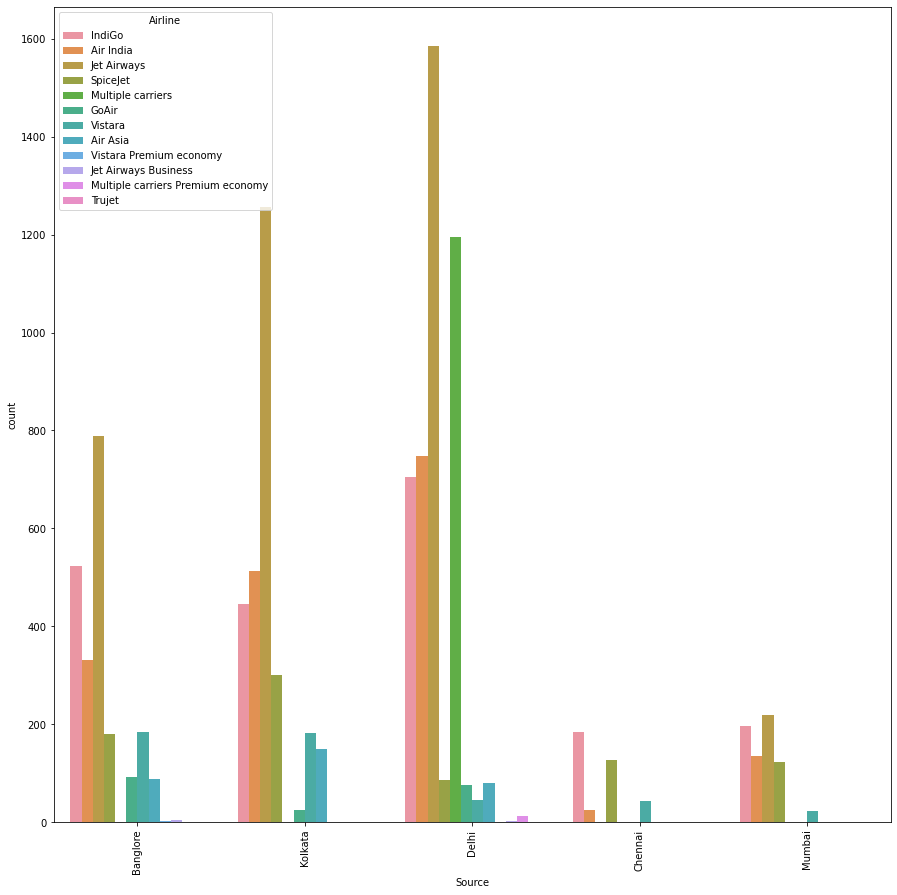

In [36]:
plt.subplots(figsize=(15,15))
sns.countplot(x='Source',hue='Airline',data=df)
plt.xticks(rotation=90)

# Most of the source flights can been found in Delhi in which jet airways is at the top

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

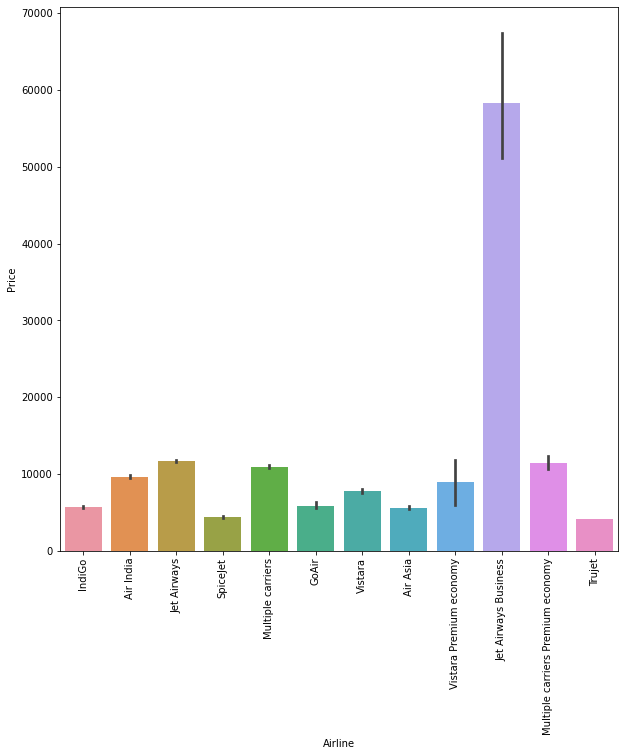

In [37]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

# use label encoding to convert remaining object type data to numerical

In [38]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Price               int64
month               int64
time                int64
dtype: object

In [39]:
#using label encoder to convet train data into numerical
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [40]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,time
0,3,0,5,0,8,3897,3,170
1,1,3,0,2,8,7662,5,445
2,4,2,1,2,8,13882,6,1140
3,3,3,0,1,8,6218,5,325
4,3,0,5,1,8,13302,3,285
...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,4,150
10679,1,3,0,0,8,4145,4,155
10680,4,0,2,0,8,7229,4,180
10681,10,0,5,0,8,12648,3,160


In [41]:
df2.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
month               int64
time                int64
dtype: object

In [42]:
#using label encoder to convet test data into numerical
le=LabelEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=le.fit_transform(df2[i])

In [43]:
df.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int64
Additional_Info    int32
Price              int64
month              int64
time               int64
dtype: object

In [44]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,month,time
0,4,2,1,1,5,6,655
1,3,3,0,1,5,5,240
2,4,2,1,1,3,5,1425
3,6,2,1,1,5,5,780
4,0,0,2,0,5,6,170
...,...,...,...,...,...,...,...
2666,1,3,0,1,5,6,1435
2667,3,3,0,0,5,3,155
2668,4,2,1,1,5,3,395
2669,1,2,1,1,5,3,915


In [45]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,time
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,0.824207,7.393054,9087.064121,4.708602,643.093232
std,2.352155,1.177221,1.474782,0.675199,1.214211,4611.359167,1.164357,507.862001
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,3.000000,170.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,8372.000000,5.000000,520.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,12373.000000,6.000000,930.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,6.000000,2860.000000


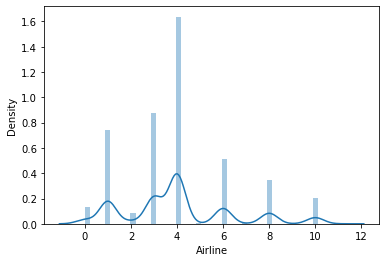

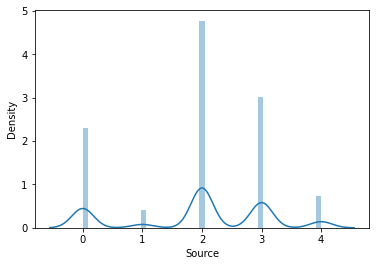

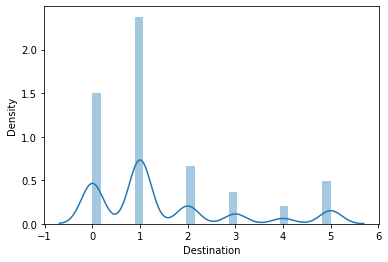

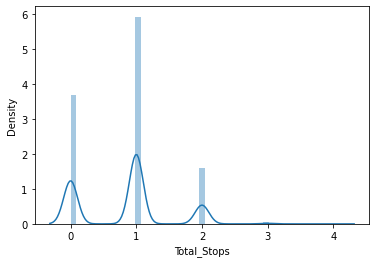

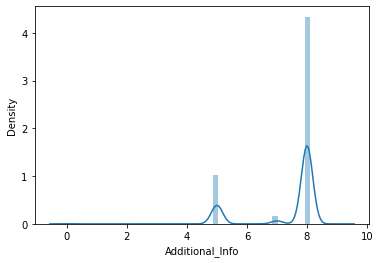

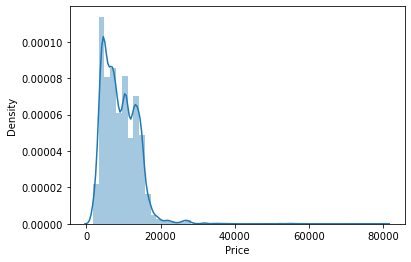

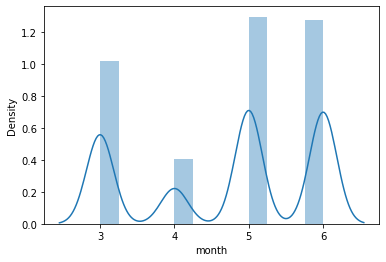

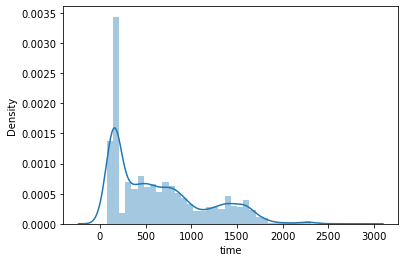

In [46]:
#to check for skewness
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

# we can there is some skewness present in the data

# checking the relation of price with other columns using scatter plot

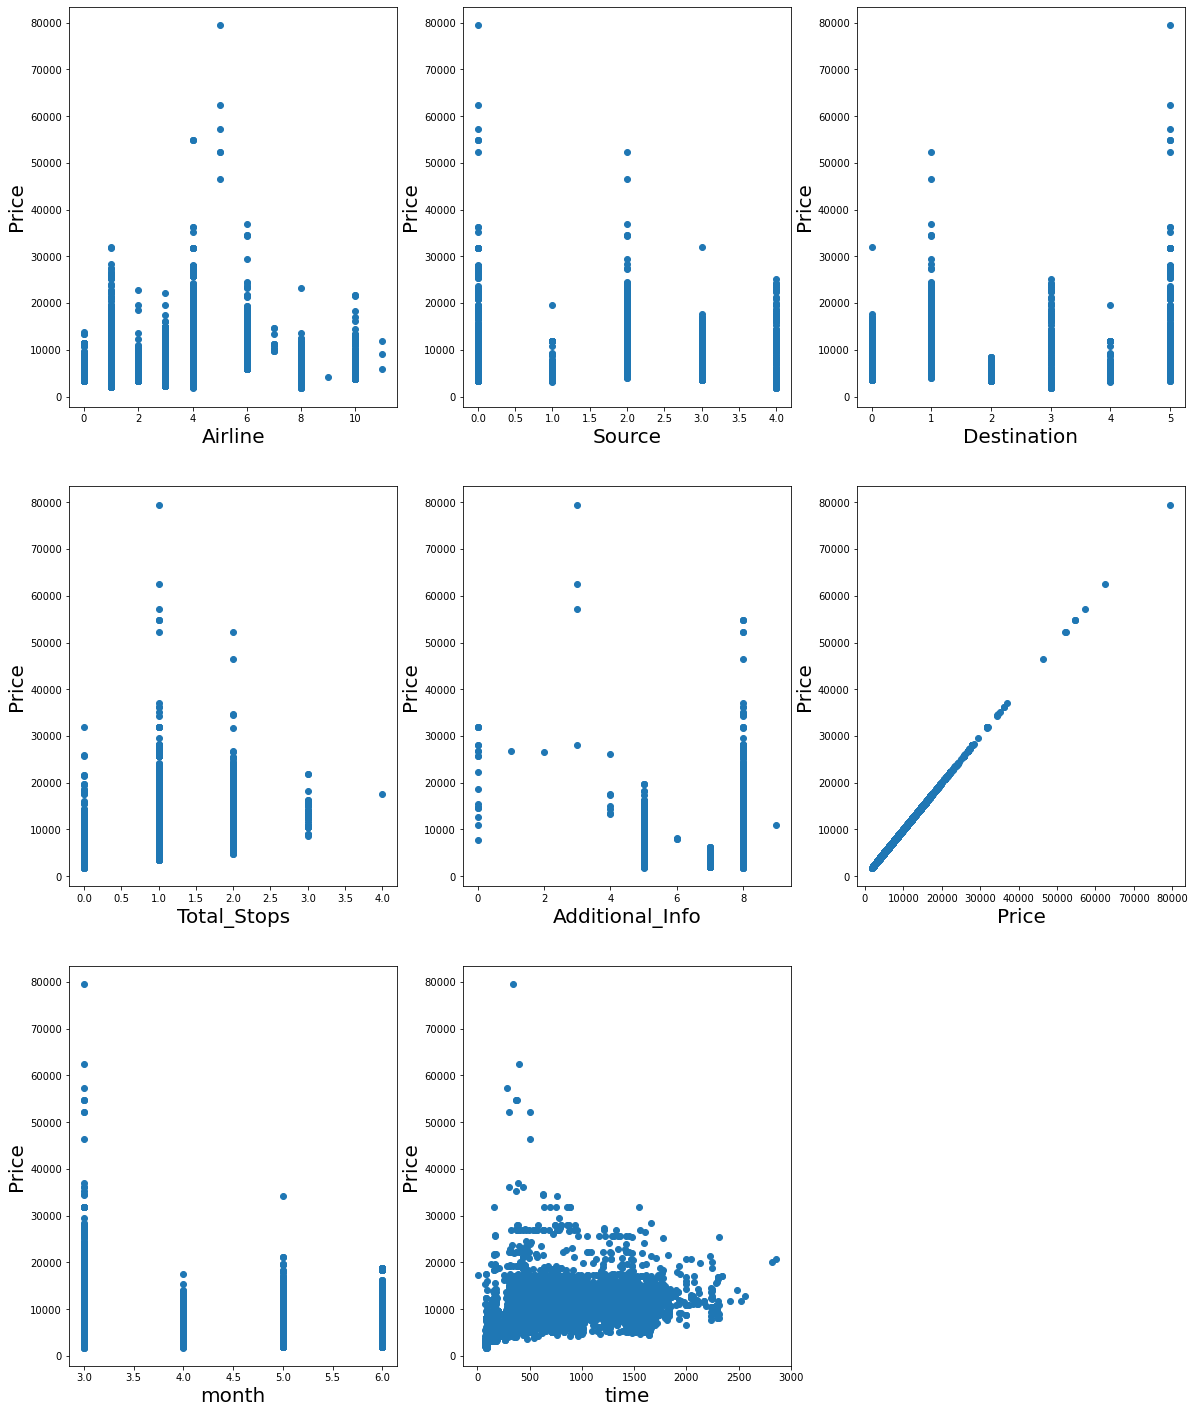

In [47]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df[i],df['Price'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.show()

# compared to all other columns time is scattered

<AxesSubplot:>

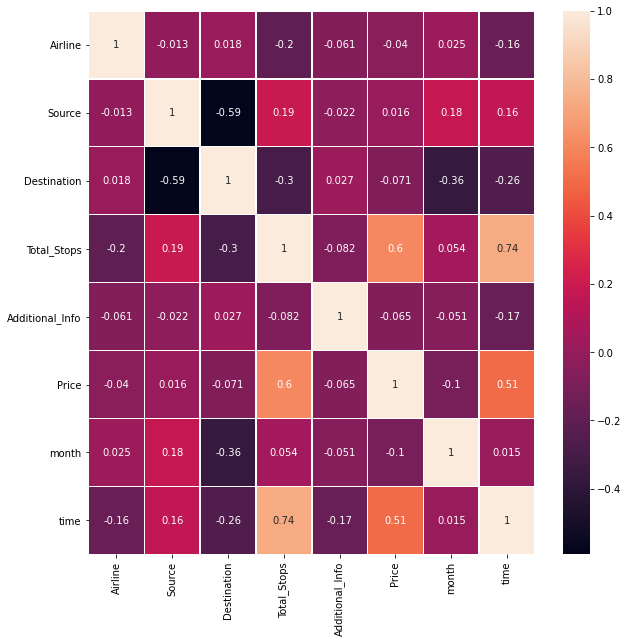

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# from the above correlation we can see that month is have the least correlation with the price so we can drop the column

In [49]:
#drop month in train dataset
df=df.drop(['month'],axis=1)

In [50]:
#drop month in test dataset
df2=df2.drop(['month'],axis=1)

# Now we check the Outliers in the data

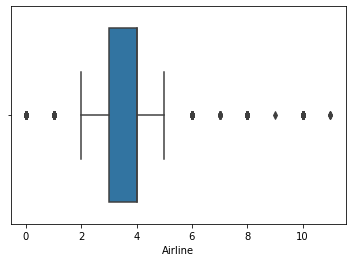

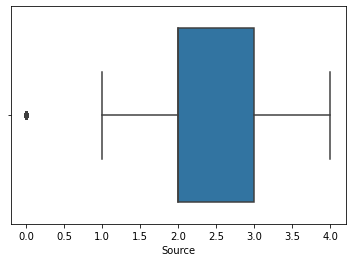

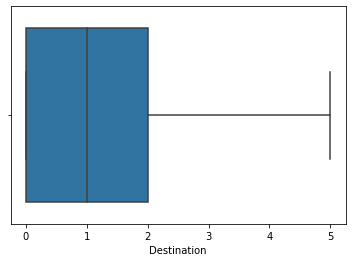

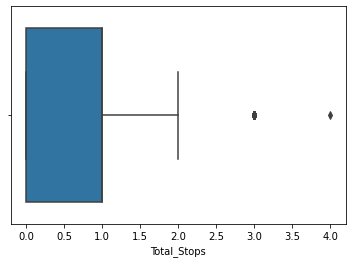

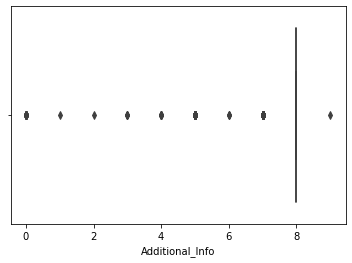

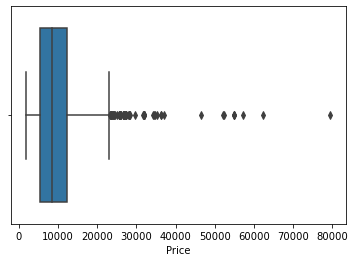

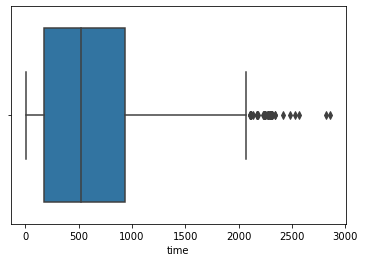

In [51]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Airline               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Source             AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Destination        AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Total_Stops        AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Additional_Info    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Price              AxesSubplot(0.789286,0.536818;0.110714x0.343182)
time                     AxesSubplot(0.125,0.125;0.110714x0.343182)
dtype: object

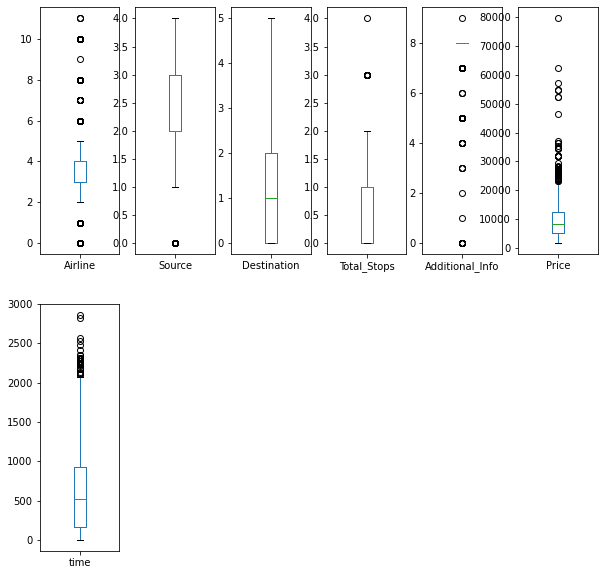

In [52]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

# we can see that the outliers are present in almost all the columns so we remove the outliers

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [54]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1785,  1791,  1804,  1918,  2055,  2079,  2099,
        2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,  2556,
        2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,  2718,
        2718,  2814,  2822,  2924,  2924,  3032,  3032,  3111,  3111,
        3157,  3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,
        3584,  3700,  3700,  3788,  3790,  3815,  3815,  3945,  3966,
        4012,  4047,  4118,  4118,  4463,  4463,  4521,  4521,  4655,
        4655,  4676,  4760,  4829,  5013,  5013,  5050,  5136,  5372,
        5372,  5439,  5446,  5516,  5628,  5662,  5701,  5701,  5710,
        5711,  5719,  5738,  5745,  5782,  5838,  5856,  5933,  5947,
        5953,  5986

In [55]:
df1=df[(z<3).all(axis=1)]
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,time
0,3,0,5,0,8,3897,170
1,1,3,0,2,8,7662,445
2,4,2,1,2,8,13882,1140
3,3,3,0,1,8,6218,325
4,3,0,5,1,8,13302,285
...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,150
10679,1,3,0,0,8,4145,155
10680,4,0,2,0,8,7229,180
10681,10,0,5,0,8,12648,160


In [56]:
df.shape

(10683, 7)

In [57]:
df1.shape

(10480, 7)

In [58]:
data_loss=(10683-10480)/10683*100
data_loss

1.9002152953290274

# the data loss is only 1% after removing the outliers so we can move forward

# Removing Skewness

In [59]:
x=df1.drop(['Price'],axis=1)
y=df1['Price']

In [60]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,time
0,3,0,5,0,8,170
1,1,3,0,2,8,445
2,4,2,1,2,8,1140
3,3,3,0,1,8,325
4,3,0,5,1,8,285
...,...,...,...,...,...,...
10678,0,3,0,0,8,150
10679,1,3,0,0,8,155
10680,4,0,2,0,8,180
10681,10,0,5,0,8,160


In [61]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time'],
      dtype='object')

In [62]:
#using power transform to remove skewness 
from sklearn.preprocessing import power_transform
x[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time']]=power_transform(x[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time']],method='yeo-johnson')
x

,Airline,Source,Destination,Total_Stops,Additional_Info,time
0,-0.305574,-1.612780,1.778018,-1.287060,0.526337,-1.050117
1,-1.428610,0.894950,-1.363892,1.639405,0.526337,-0.039398
2,0.137803,-0.027379,0.020954,1.639405,0.526337,1.072303
3,-0.305574,0.894950,-1.363892,0.381113,0.526337,-0.382912
4,-0.305574,-1.612780,1.778018,0.381113,0.526337,-0.522548
...,...,...,...,...,...,...
10678,-2.248762,0.894950,-1.363892,-1.287060,0.526337,-1.172815
10679,-1.428610,0.894950,-1.363892,-1.287060,0.526337,-1.140860
10680,0.137803,-1.612780,0.726321,-1.287060,0.526337,-0.993431
10681,2.117951,-1.612780,1.778018,-1.287060,0.526337,-1.109792


# Afte all the EDA and cleansing of data we can now scale the data

In [63]:
#scaling non categorical data
sc=StandardScaler()

In [64]:
x[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time']]=sc.fit_transform(x[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'time']])

# checking Vif

In [65]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,1.057558,Airline
1,1.680730,Source
2,1.835678,Destination
3,3.770417,Total_Stops
4,1.068695,Additional_Info
5,3.987624,time


everything looks fine

# Model building

In [66]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [67]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 82,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
score 0.7430052671803511
r2 0.7467106642660422
diff 0.0037053970856910645


LinearRegression()
score 0.5212589823010493
r2 0.5089195709426348
diff 0.012339411358414432


Ridge()
score 0.5212591894040199
r2 0.5089223615834682
diff 0.012336827820551788


BayesianRidge()
score 0.5212603294958486
r2 0.5089428808147982
diff 0.012317448681050336


SGDRegressor()
score 0.5212643709386062
r2 0.5085726526492063
diff 0.012691718289399967


SVR()
score 0.11551824399440289
r2 0.15393869941788374
diff 0.038420455423480854


AdaBoostRegressor()
score 0.5792242203428252
r2 0.5771595461384205
diff 0.002064674204404704


KNeighborsRegressor()
score 0.7589803322913365
r2 0.7577548098002583
diff 0.0012255224910782125


RandomForestRegressor()
score 0.7637765014848128
r2 0.7632896789109275
diff 0.000486822573885326


BaggingRegressor()
score 0.7609088620874916
r2 0.7641862278492938
diff 0.0032773657618021534


DecisionTreeRegressor()
score 0.7434721218684299
r2 0.74421215237427

In [69]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state =142,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
score 0.7396261761720266
r2 0.7645557959463148
diff 0.024929619774288203


LinearRegression()
score 0.5142313866311632
r2 0.535577831231183
diff 0.021346444600019776


Ridge()
score 0.5142317403532204
r2 0.5355786639970266
diff 0.021346923643806193


BayesianRidge()
score 0.5142339189299833
r2 0.5355847260108582
diff 0.02135080708087489


SGDRegressor()
score 0.5141258624187983
r2 0.5348794291475674
diff 0.020753566728769046


SVR()
score 0.11078229640255473
r2 0.13294801029249292
diff 0.022165713889938196


AdaBoostRegressor()
score 0.5430615274346053
r2 0.5686457382614285
diff 0.02558421082682316


KNeighborsRegressor()
score 0.7532042051866445
r2 0.7785284330196203
diff 0.02532422783297572


RandomForestRegressor()
score 0.7566200758333359
r2 0.7828665683517162
diff 0.026246492518380293


BaggingRegressor()
score 0.7539369033577771
r2 0.7799286792171805
diff 0.025991775859403377


DecisionTreeRegressor()
score 0.7313590402102002
r2 0.7659688240741936
diff

# we ran train test with cross validation scores and set scoring to r2 to check the mean cross_val when set to 5           

# we got more than 77% r2 score on RandomForestRegressor, KNeighborsRegressor, BaggingRegressor

# hypertuning parameters of the top models

# Bagging regressor

In [ ]:
parameters={'n_estimators':[10,500],'max_features':[0.001,0.01,0.1,1.0]}
clf=GridSearchCV(BaggingRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 142,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x_train,y_train)
y_pred=br.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2 score :',score)

r2 score : 0.783628025417049


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 142,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x,y)
y_pred=br.predict(x)
score=r2_score(y,y_pred)
print('r2 score :',score)

r2 score : 0.842635237275271


# KNeighbors

In [207]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)

{'n_neighbors': 7}


In [209]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 142,test_size=0.20,shuffle=True)
knr=KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
score=r2_score(y_test,y_pred)
print('R2 score:',score)

R2 score: 0.7822392046504187


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 142,test_size=0.20,shuffle=True)
knr=KNeighborsRegressor(n_neighbors=7)
knr.fit(x,y)
y_pred=knr.predict(x)
score=r2_score(y,y_pred)
print('R2 score:',score)

R2 score: 0.8091078922601023


# Random forest regressor

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 142,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
score=r2_score(y_test,y_pred)
print('R2 score :',score)

R2 score : 0.7851067452025852


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 142,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x,y)
y_pred=rfr.predict(x)
print("r2_score is:",r2_score(y,y_pred))

r2_score is: 0.8423105572709444


# we will be saving Random Forest Regressor as our best performing regression model for this dataset when it comes to predicting price.

# testing the Model on test data

In [214]:
df2['price']=rfr.predict(df2)

In [217]:
df2

,Airline,Source,Destination,Total_Stops,Additional_Info,time,price
0,4,2,1,1,5,655,12139.689024
1,3,3,0,1,5,240,12453.229357
2,4,2,1,1,3,1425,12139.689024
3,6,2,1,1,5,780,12139.689024
4,0,0,2,0,5,170,14182.935000
...,...,...,...,...,...,...,...
2666,1,3,0,1,5,1435,12767.012932
2667,3,3,0,0,5,155,12453.229357
2668,4,2,1,1,5,395,12139.689024
2669,1,2,1,1,5,915,12514.635170


# saving the model

In [218]:
joblib.dump(rfr,'flights.csv')

['flights.csv']